In [116]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D, Input

In [117]:
def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [128]:
path = "drive/MyDrive/Colab Notebooks/source/"
folders = ["bishop", "knight", "pawn", "queen", "rook"]

cpt = 0
for f in folders:
    cpt += len(os.listdir(path+f))

X = np.empty((cpt, 50, 50))
Y = np.empty((cpt), dtype = object)
i = 0

for f in folders:
    for file in os.listdir(path+f):
        #img = Image.open("source/"+f+"/"+file)
        img = cv2.imread(path+f+"/"+file)
        img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
        img = cv2.resize(img , (50,50))
        X[i] = asarray(img)
        Y[i] = f
        i += 1

X /= 255
y_label_encoder = LabelEncoder()
Y = y_label_encoder.fit_transform(Y)
X.shape

(651, 50, 50)

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((520, 50, 50), (131, 50, 50), (520,), (131,))

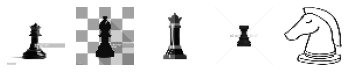

In [130]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i,:], cmap = "gray")
    plt.axis('off')
plt.show()

In [131]:
# Preprocess input data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Preprocess class labels
y_train = tf.keras.utils.to_categorical(y_train, 5)
y_test = tf.keras.utils.to_categorical(y_test, 5)

In [132]:
print("nombre d'images en train : ", len(x_train))
print("nombre d'images en test : ", len(x_test))

print("la taille des images est : ", len(x_train[0]),'x',len(x_train[0][0]),"pixels")

print("Nombre de  de classes : ", y_test.shape[1])

nombre d'images en train :  520
nombre d'images en test :  131
la taille des images est :  50 x 50 pixels
Nombre de  de classes :  5


In [137]:
# kernel_size  = taille de la petite fenêtre d'analyse des pixels. (3,3) on analyse par carré de 3*3 pixels
kernel = (2,2)

inputs = Input(shape=(50,50,1)) 
x = inputs
x = Convolution2D(256, kernel_size = kernel, activation='relu' )(x)
x = MaxPooling2D(kernel)(x) 
x = Flatten()(x) 
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x) 
outputs = Dense(5, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary() 

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 50, 50, 1)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 49, 49, 256)       1280      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 147456)            0         
                                                                 
 dense_95 (Dense)            (None, 256)               37748992  
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                          

Epoch 1/20
17/17 [==============================] - 1s 33ms/step - loss: 1.6624 - accuracy: 0.2519 - val_loss: 1.5947 - val_accuracy: 0.2137
Epoch 2/20
17/17 [==============================] - 0s 17ms/step - loss: 1.5495 - accuracy: 0.3038 - val_loss: 1.5844 - val_accuracy: 0.1679
Epoch 3/20
17/17 [==============================] - 0s 17ms/step - loss: 1.4759 - accuracy: 0.3712 - val_loss: 2.1645 - val_accuracy: 0.2290
Epoch 4/20
17/17 [==============================] - 0s 20ms/step - loss: 1.4809 - accuracy: 0.3827 - val_loss: 1.5576 - val_accuracy: 0.3130
Epoch 5/20
17/17 [==============================] - 0s 19ms/step - loss: 1.2320 - accuracy: 0.5077 - val_loss: 1.4608 - val_accuracy: 0.3664
Epoch 6/20
17/17 [==============================] - 0s 16ms/step - loss: 1.2792 - accuracy: 0.4904 - val_loss: 1.4762 - val_accuracy: 0.2901
Epoch 7/20
17/17 [==============================] - 0s 17ms/step - loss: 1.2729 - accuracy: 0.5019 - val_loss: 1.5425 - val_accuracy: 0.3664
Epoch 8/20
17

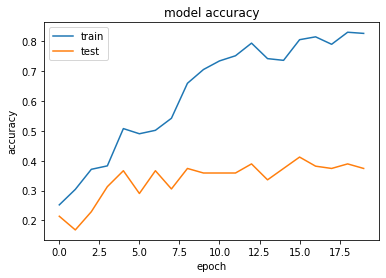

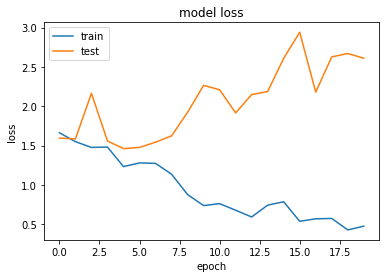

In [138]:
lr = 0.1
batch_size = 32
epochs = 20
sgd1= tf.keras.optimizers.SGD(learning_rate = lr, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd1, metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    verbose = 1,validation_data = (x_test, y_test))
affiche(history)

Test loss: 2.6105010509490967
Test accuracy: 37.40457892417908
5/5 [==============================] - 0s 4ms/step
Confusion Matrix
[[11  4  7  5  3]
 [ 0 18  4  1  5]
 [ 2  3  6  2  1]
 [10  4  6  2  3]
 [ 3  7  5  7 12]]


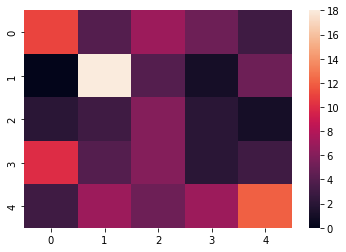

In [139]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
print('Confusion Matrix')
cm = confusion_matrix(y_test.argmax(axis = -1), y_pred)
print(cm)
sns.heatmap(cm)
plt.show()

In [140]:
print(classification_report(y_test.argmax(axis = -1), y_pred))

              precision    recall  f1-score   support

           0       0.42      0.37      0.39        30
           1       0.50      0.64      0.56        28
           2       0.21      0.43      0.29        14
           3       0.12      0.08      0.10        25
           4       0.50      0.35      0.41        34

    accuracy                           0.37       131
   macro avg       0.35      0.37      0.35       131
weighted avg       0.38      0.37      0.37       131



Modèle pas très satisfaisant. Dataset trop petit ou images trop complexes ?